# Marelle Board import
* Getting players info dict => `MarelleBoard.players`
* 3 phases : place, move and end => `MarelleBoard.phase`
* Reset the board => `MarelleBoard.initialize_game()`
* Printing the board => `MarelleBoard.print_board()`
* Id:Action dict => `MarelleBoard.id_to_action`
* Action:Id dict => `MarelleBoard.action_to_id`
* Get the board state => `MarelleBoard.get_state()`
* Play an action => `MarelleBoard.play_action(action_id, player)`
* Get legal action ids => `MarelleBoard.get_legal_action_ids(player)`
* Check if game ended (returns 0 if not ended or winning player id) : `MarelleBoard.check_if_end(player)`

In [ ]:
import importlib

import marl_env
import marl_agents
import marl_models
importlib.reload(marl_env)
importlib.reload(marl_agents)
importlib.reload(marl_models)

from marl_env import MarelleBoard, MarelleGymEnv, MarelleGame
from marl_models import FCModel, ConvModel
from marl_agents import RandomAgent, BetterRandomAgent, SingleModelReinforce, ReinforceAgent, MarelleAgent
from marl_train import train_agent

import progressbar as pb
import numpy as np 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import wandb

import torch
import torch.nn as nn

# Training
## Place phase

In [5]:
import marl_env
import marl_agents
import marl_models
importlib.reload(marl_env)
importlib.reload(marl_agents)
importlib.reload(marl_models)

from marl_env import MarelleBoard, MarelleGymEnv, MarelleGame
from marl_models import FCModel, ConvModel
from marl_agents import RandomAgent, BetterRandomAgent, SingleModelReinforce, ReinforceAgent, MarelleAgent
from marl_train import train_agent

env = MarelleGymEnv(end_after_place_phase=True)

# Models
einstein_fc_model = FCModel(env.N_STATE, env.N_TOTAL_PLACE_ACTIONS)
einstein_conv_model = ConvModel(env.N_TOTAL_PLACE_ACTIONS)

# Agents
einstein_fc = SingleModelReinforce(env=env, player_id=1, model=einstein_fc_model, lr=0.005, win_reward=0, defeat_reward=0, capture_reward=2, captured_reward=-1, epsilon=0, gamma=1)

einstein_conv = SingleModelReinforce(env=env, player_id=1, model=einstein_conv_model, lr=0.00005, win_reward=0, defeat_reward=0, capture_reward=2, captured_reward=-1, epsilon=0, gamma=1)

# Opponents
opponent_agent=BetterRandomAgent(env, -1)
evaluate_agent=RandomAgent(env,-1)

# Training Fully Connected agent
train_agent(
    env=env,
    n_epochs=20,
    n_trajectories=50,
    trained_agent=einstein_fc,
    opponent_agent=opponent_agent,
    evaluate_agent=evaluate_agent,
    log_training=False,
    save_model_freq=5,
    evaluate_freq=2
)

# Training Conv agent
train_agent(
    env=env,
    n_epochs=20,
    n_trajectories=50,
    trained_agent=einstein_conv,
    opponent_agent=opponent_agent,
    evaluate_agent=evaluate_agent,
    log_training=False,
    save_model_freq=5,
    evaluate_freq=2
)

[0, 0, 0, 0, -1, 0, -1, 0, -1]
[0, 0, 0, 0, 0, -1, 0, -1, 0]
[0, 0, 0, 0, 0, -1, -1, 0, 1]
[0, 0, -1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, -1, 0, 0, -1, 0, 0]
[0, 0, 0, 0, 0, -1, 1, 0, -1]
[0, 0, 0, 0, 0, 0, -1, 0, 0]
[0, 0, 0, -1, 0, -1, 0, -1, 0]
[0, 0, 0, -1, -1, 0, 0, 0, 0]
[0, 0, 0, -1, 0, -1, 0, 0, 0]
[0, 0, 0, -1, 0, -1, 0, 0, -1]
[0, 0, 0, 0, 0, 0, -1, 0, -1]
[0, 0, 0, 0, 0, 0, 0, -1, 0]
[0, 0, 0, -1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, -1, -1, 0, 0, -1]
[0, 0, 0, -1, 0, 0, 0, 0, -1]
[0, 0, 0, -1, 0, 0, 0, 0, 0]
[0, 0, 0, -1, 0, 0, 0, -1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, -1]
[0, 0, 0, 0, 0, -1, 2, 0, 1]
[0, 0, 0, 0, 0, -1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, -1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, -1]
[0, 0, 0, -1, 0, 0, -1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, -1]
[0, 0, 0, 0, 0, -1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, -1, 1]
[0, 0, -1, 0, 0, -1, 0, 0, -1]
[0, 0, 0, 0, 0, -1, 0, -1, 0]
[0, 0, 0, 0, -1, 0, 0, 0, -1]
[0, 0, 0, 0, 0, -1, 1, 0, -1]
[0, 0, 0, 0, -1, 0, 0, -1, 0]
[0, 0, 0, 0, -1, 0, -1, 0, 0]
[0, 0, 0, 0, -1, 0

IndexError: index 726 is out of bounds for axis 0 with size 576

In [4]:
import marl_env
import marl_agents
import marl_models
importlib.reload(marl_env)
importlib.reload(marl_agents)
importlib.reload(marl_models)

from marl_env import MarelleBoard, MarelleGymEnv, MarelleGame
from marl_models import FCModel, ConvModel
from marl_agents import RandomAgent, BetterRandomAgent, SingleModelReinforce, ReinforceAgent, MarelleAgent
from marl_train import train_agent

env = MarelleGymEnv(end_after_place_phase=False)

# Models
einstein_fc_model = FCModel(env.N_STATE, env.N_TOTAL_ACTIONS)
einstein_conv_model = ConvModel(env.N_TOTAL_ACTIONS)

# Agents
einstein_fc = SingleModelReinforce(env=env, player_id=1, model=einstein_fc_model, lr=0.005, win_reward=0, defeat_reward=0, capture_reward=2, captured_reward=-1, epsilon=0, gamma=1)

einstein_conv = SingleModelReinforce(env=env, player_id=1, model=einstein_conv_model, lr=0.00005, win_reward=0, defeat_reward=0, capture_reward=2, captured_reward=-1, epsilon=0, gamma=1)

# Opponents
opponent_agent=BetterRandomAgent(env, -1)
evaluate_agent=RandomAgent(env,-1)

# Training Fully Connected agent
train_agent(
    env=env,
    n_epochs=10,
    n_trajectories=20,
    trained_agent=einstein_fc,
    opponent_agent=opponent_agent,
    evaluate_agent=evaluate_agent,
    log_training=False,
    save_model_freq=5,
    evaluate_freq=2
)

# Training Conv agent
train_agent(
    env=env,
    n_epochs=10,
    n_trajectories=20,
    trained_agent=einstein_conv,
    opponent_agent=opponent_agent,
    evaluate_agent=evaluate_agent,
    log_training=False,
    save_model_freq=5,
    evaluate_freq=2
)

{'n_actions': 90.28, 'n_captures_place': 2.38, 'n_captured_place': 1.21, 'n_captures_move': 2.86, 'n_captured_move': 3.31, 'draws_%': 0.03, 'victories_capture_%': 0.53, 'victories_block_%': 0.0, 'defeats_capture_%': 0.44, 'defeats_block_%': 0.0}
{'n_actions': 91.4, 'n_captures_place': 2.52, 'n_captured_place': 1.24, 'n_captures_move': 3.11, 'n_captured_move': 3.13, 'draws_%': 0.06, 'victories_capture_%': 0.58, 'victories_block_%': 0.0, 'defeats_capture_%': 0.36, 'defeats_block_%': 0.0}
Episode 5/10: rewards -2.8 +/- 4.24 - Loss : -404.05792236328125
{'n_actions': 84.55, 'n_captures_place': 2.27, 'n_captured_place': 1.41, 'n_captures_move': 2.69, 'n_captured_move': 3.68, 'draws_%': 0.05, 'victories_capture_%': 0.46, 'victories_block_%': 0.0, 'defeats_capture_%': 0.49, 'defeats_block_%': 0.0}
{'n_actions': 91.88, 'n_captures_place': 2.59, 'n_captured_place': 1.35, 'n_captures_move': 3.3, 'n_captured_move': 2.74, 'draws_%': 0.07, 'victories_capture_%': 0.65, 'victories_block_%': 0.0, 'def

RuntimeError: mat1 and mat2 shapes cannot be multiplied (40x1 and 40x1476)

In [ ]:
print("start training")
train_agent(
    env=env,
    n_epochs=500,
    n_trajectories=5000,
    trained_agent=einstein,
    opponent_agent=gabi,
    evaluate_agent=gabi,
    log_training=False,
    save_model_freq=50,
    evaluate_freq=10
)

start training
Episode 5/500: rewards 0.26 +/- 1.17 - Loss : 4.908871650695801
Episode 10/500: rewards 0.27 +/- 1.2 - Loss : 4.815968990325928
Episode 15/500: rewards 0.27 +/- 1.19 - Loss : 4.94525146484375
Episode 20/500: rewards 0.31 +/- 1.18 - Loss : 5.8011322021484375
Episode 25/500: rewards 0.3 +/- 1.19 - Loss : 5.382771968841553
Episode 30/500: rewards 0.28 +/- 1.17 - Loss : 4.984109878540039
Episode 35/500: rewards 0.24 +/- 1.19 - Loss : 3.8443679809570312
Episode 40/500: rewards 0.28 +/- 1.2 - Loss : 4.8934736251831055
Episode 45/500: rewards 0.3 +/- 1.17 - Loss : 5.1661529541015625
Episode 50/500: rewards 0.28 +/- 1.2 - Loss : 4.642369270324707
Episode 55/500: rewards 0.32 +/- 1.2 - Loss : 5.436619758605957
Episode 60/500: rewards 0.31 +/- 1.16 - Loss : 5.405096054077148
Episode 65/500: rewards 0.31 +/- 1.19 - Loss : 5.265673637390137
Episode 70/500: rewards 0.28 +/- 1.18 - Loss : 4.475854873657227
Episode 75/500: rewards 0.32 +/- 1.2 - Loss : 5.420974254608154
Episode 80/500:

In [ ]:
print("start training")
train_agent(
    env=env,
    n_epochs=500,
    n_trajectories=5000,
    trained_agent=einstein,
    opponent_agent=gabi,
    evaluate_agent=gabi,
    log_training=False,
    save_model_freq=50,
    evaluate_freq=10
)

## Restoring Models

In [5]:
def load_model(model_name, run_id, model):
    wandb.restore(model_name, run_path=f'clement-guillo/marl/{run_id}',root= "models/temp/")
    model.load_state_dict(torch.load(f'models/temp/{model_name}'))
    os.remove(f'models/temp/{model_name}')
    return(model)

# einstein_model=load_model('model_1_200.pt','d5zabrxq',FCModel(len(env.board.get_state()),len(env.board.id_to_action)))
# einstein=Reinforce(env, 1, einstein_model, lr=0.0001, incentivize_captures=False, punish_opponent_captures=False)


# Playing games

In [6]:
env = MarelleGymEnv()
piccolo = BetterRandomAgent(env, -1)

# game = MarelleGame(env=env, player1=piccolo, player2=einstein)
game = MarelleGame(env=env, player1="human", player2=piccolo)

In [7]:
action_history = game.play()

BetterRandomAgent 2's turn to play :

        Phase : place
        Placed tokens : P1 : 2 / P2 : 2 
        Tokens on board : P1 : 2 / P2 : 2 
        2--------------0--------------2
        |              |              |
        |    0---------0---------0    |
        |    |         |         |    |
        |    |    0----0----0    |    |
        |    |    |         |    |    |
        0----1----0         1----0----0                 
        |    |    |         |    |    |
        |    |    0----0----0    |    |
        |    |         |         |    |
        |    0---------0---------0    |
        |              |              |
        0--------------0--------------0
        


Exception: Illegal place move

## Evaluating an agent by playing n_games

In [4]:
from marl_evaluations import evaluate

env = MarelleGymEnv()
piccolo = BetterRandomAgent(env, 1)
gabrielle = BetterRandomAgent(env, -1)

evaluation = evaluate(env, piccolo, gabrielle, 100, 1)
evaluation_2 = evaluate(env, piccolo, gabrielle, 1000, 1)
print(evaluation,evaluation_2)

{'n_actions': 56.22, 'n_captures_place': 0.33, 'n_captured_place': 0.35, 'n_captures_move': 3.76, 'n_captured_move': 4.37, 'draws_%': 0.0, 'victories_capture_%': 0.43, 'victories_block_%': 0.01, 'defeats_capture_%': 0.55, 'defeats_block_%': 0.01} {'n_actions': 56.146, 'n_captures_place': 0.266, 'n_captured_place': 0.238, 'n_captures_move': 3.8, 'n_captured_move': 4.453, 'draws_%': 0.0, 'victories_capture_%': 0.436, 'victories_block_%': 0.02, 'defeats_capture_%': 0.523, 'defeats_block_%': 0.021}


# Time test

Episode 5/10: rewards -0.64 +/- 0.77 - Loss : -79.2606430053711
Episode 10/10: rewards -0.58 +/- 0.81 - Loss : -67.5904312133789
         124927328 function calls (124617993 primitive calls) in 63.214 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(allclose)
        9    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
        8    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amin)
      137    0.000    0.000    0.001    0.000 <__array_function__ internals>:2(any)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(append)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(array_e

        3    0.000    0.000    0.002    0.001 _axes.py:1510(plot)
        1    0.000    0.000    0.000    0.000 _axes.py:196(get_xlabel)
        1    0.000    0.000    0.000    0.000 _axes.py:203(set_xlabel)
        1    0.000    0.000    0.000    0.000 _axes.py:249(get_ylabel)
        1    0.000    0.000    0.000    0.000 _axes.py:256(set_ylabel)
        1    0.000    0.000    0.000    0.000 _axes.py:302(get_legend_handles_labels)
        1    0.000    0.000    0.001    0.001 _axes.py:5097(_fill_between_x_or_y)
        2    0.000    0.000    0.000    0.000 _axes.py:5192(<genexpr>)
        1    0.000    0.000    0.001    0.001 _axes.py:5299(fill_between)
        1    0.000    0.000    0.016    0.016 _base.py:1038(cla)
        1    0.000    0.000    0.000    0.000 _base.py:1195(_set_title_offset_trans)
        1    0.000    0.000    0.000    0.000 _base.py:1432(set_box_aspect)
        2    0.000    0.000    0.000    0.000 _base.py:185(__init__)
        1    0.000    0.000    0.000    0.

       21    0.000    0.000    0.000    0.000 _ufunc_config.py:429(__init__)
       21    0.000    0.000    0.000    0.000 _ufunc_config.py:433(__enter__)
       21    0.000    0.000    0.000    0.000 _ufunc_config.py:438(__exit__)
        4    0.000    0.000    0.000    0.000 _validators.py:208(validate_bool_kwarg)
        2    0.000    0.000    0.000    0.000 _validators.py:218(validate_axis_style_args)
        9    0.000    0.000    0.000    0.000 abc.py:100(__subclasscheck__)
      454    0.000    0.000    0.000    0.000 abc.py:96(__instancecheck__)
    94836    0.072    0.000    0.787    0.000 activation.py:101(forward)
    47418    0.041    0.000    0.603    0.000 activation.py:1139(forward)
       10    0.001    0.000    0.004    0.000 adam.py:51(step)
       14    0.000    0.000    0.000    0.000 algorithms.py:1487(_get_take_nd_function)
       14    0.000    0.000    0.001    0.000 algorithms.py:1616(take_nd)
        3    0.000    0.000    0.000    0.000 algorithms.py:178(_rec

        1    0.000    0.000    0.000    0.000 base.py:2835(_assert_can_do_setop)
       21    0.000    0.000    0.001    0.000 base.py:2851(get_loc)
    50/22    0.001    0.000    0.003    0.000 base.py:293(__new__)
        2    0.000    0.000    0.000    0.000 base.py:2957(get_indexer)
        2    0.000    0.000    0.000    0.000 base.py:3115(_validate_positional_slice)
        1    0.000    0.000    0.000    0.000 base.py:3275(_can_reindex)
        1    0.000    0.000    0.000    0.000 base.py:3291(reindex)
       61    0.000    0.000    0.000    0.000 base.py:3870(_values)
       12    0.000    0.000    0.000    0.000 base.py:3896(_get_engine_target)
        2    0.000    0.000    0.000    0.000 base.py:3980(_coerce_scalar_to_index)
       36    0.000    0.000    0.000    0.000 base.py:4036(__contains__)
       21    0.000    0.000    0.000    0.000 base.py:4083(__getitem__)
      388    0.000    0.000    0.000    0.000 base.py:413(find)
        1    0.000    0.000    0.000    0.00

        1    0.000    0.000    0.000    0.000 concat.py:295(__init__)
        1    0.000    0.000    0.000    0.000 concat.py:379(<listcomp>)
        1    0.000    0.000    0.000    0.000 concat.py:456(get_result)
        1    0.000    0.000    0.000    0.000 concat.py:466(<listcomp>)
        1    0.000    0.000    0.000    0.000 concat.py:511(_get_result_dim)
        1    0.000    0.000    0.000    0.000 concat.py:517(_get_new_axes)
        1    0.000    0.000    0.000    0.000 concat.py:519(<listcomp>)
        1    0.000    0.000    0.000    0.000 concat.py:534(_get_concat_axis)
        1    0.000    0.000    0.000    0.000 concat.py:540(<listcomp>)
        1    0.000    0.000    0.000    0.000 concat.py:584(_maybe_check_integrity)
        1    0.000    0.000    0.000    0.000 concat.py:591(_concat_indexes)
        1    0.000    0.000    0.000    0.000 concat.py:70(concat)
       20    0.000    0.000    0.000    0.000 config.py:104(_get_option)
       20    0.000    0.000    0.000   

      137    0.000    0.000    0.000    0.000 fromnumeric.py:2245(_any_dispatcher)
      137    0.000    0.000    0.001    0.000 fromnumeric.py:2249(any)
        6    0.000    0.000    0.000    0.000 fromnumeric.py:2333(_all_dispatcher)
        6    0.000    0.000    0.000    0.000 fromnumeric.py:2337(all)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2414(_cumsum_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:2418(cumsum)
        9    0.000    0.000    0.000    0.000 fromnumeric.py:2584(_amax_dispatcher)
        9    0.000    0.000    0.000    0.000 fromnumeric.py:2589(amax)
        8    0.000    0.000    0.000    0.000 fromnumeric.py:2709(_amin_dispatcher)
        8    0.000    0.000    0.000    0.000 fromnumeric.py:2714(amin)
        4    0.000    0.000    0.000    0.000 fromnumeric.py:2876(_prod_dispatcher)
        4    0.000    0.000    0.000    0.000 fromnumeric.py:2881(prod)
       10    0.000    0.000    0.000    0.000 fromnumeric.py:307

       60    0.000    0.000    0.000    0.000 lines.py:1175(set_markeredgewidth)
       60    0.000    0.000    0.001    0.000 lines.py:1190(set_markerfacecolor)
       60    0.000    0.000    0.001    0.000 lines.py:1204(set_markerfacecoloralt)
       60    0.000    0.000    0.000    0.000 lines.py:1218(set_markersize)
      141    0.000    0.000    0.000    0.000 lines.py:1232(set_xdata)
      150    0.000    0.000    0.000    0.000 lines.py:1244(set_ydata)
       39    0.000    0.000    0.001    0.000 lines.py:1277(update_from)
       60    0.000    0.000    0.000    0.000 lines.py:1302(set_dash_joinstyle)
       60    0.000    0.000    0.000    0.000 lines.py:1316(set_solid_joinstyle)
       60    0.000    0.000    0.000    0.000 lines.py:1346(set_dash_capstyle)
       60    0.000    0.000    0.000    0.000 lines.py:1360(set_solid_capstyle)
        1    0.000    0.000    0.000    0.000 lines.py:1382(get_solid_capstyle)
       60    0.001    0.000    0.008    0.000 lines.py:269(__in

        1    0.000    0.000    0.000    0.000 numeric.py:164(_union)
        1    0.000    0.000    0.000    0.000 numeric.py:2117(_allclose_dispatcher)
        1    0.000    0.000    0.000    0.000 numeric.py:2121(allclose)
        1    0.000    0.000    0.000    0.000 numeric.py:2193(_isclose_dispatcher)
        1    0.000    0.000    0.000    0.000 numeric.py:2197(isclose)
        1    0.000    0.000    0.000    0.000 numeric.py:2274(within_tol)
        3    0.000    0.000    0.000    0.000 numeric.py:2313(_array_equal_dispatcher)
        3    0.000    0.000    0.000    0.000 numeric.py:2317(array_equal)
        2    0.000    0.000    0.000    0.000 numeric.py:237(inferred_type)
        2    0.000    0.000    0.000    0.000 numeric.py:268(full)
        1    0.000    0.000    0.000    0.000 numeric.py:271(_is_compatible_with_other)
        5    0.000    0.000    0.000    0.000 numeric.py:50(__new__)
        2    0.000    0.000    0.000    0.000 numeric.py:71(_zeros_like_dispatcher)
 

       26    0.000    0.000    0.000    0.000 shape_base.py:608(_column_stack_dispatcher)
       26    0.000    0.000    0.000    0.000 shape_base.py:612(column_stack)
        4    0.000    0.000    0.000    0.000 shape_base.py:78(_atleast_2d_dispatcher)
        4    0.000    0.000    0.000    0.000 shape_base.py:82(atleast_2d)
        1    0.000    0.000    0.000    0.000 shutil.py:1298(get_terminal_size)
        6    0.000    0.000    0.000    0.000 socket.py:357(send)
        2    0.000    0.000    0.000    0.000 sorting.py:112(get_compressed_ids)
        1    0.000    0.000    0.000    0.000 sorting.py:182(indexer_from_factorized)
        1    0.000    0.000    0.001    0.001 sorting.py:194(lexsort_indexer)
        1    0.000    0.000    0.000    0.000 sorting.py:226(<listcomp>)
        3    0.000    0.000    0.000    0.000 sorting.py:23(get_group_index)
        2    0.000    0.000    0.000    0.000 sorting.py:392(ensure_key_mapped)
        1    0.000    0.000    0.000    0.000 sor

       16    0.000    0.000    0.000    0.000 weakref.py:44(__new__)
        6    0.000    0.000    0.000    0.000 weakref.py:51(_cb)
        2    0.000    0.000    0.000    0.000 weakref.py:73(__eq__)
        4    0.000    0.000    0.000    0.000 well_known_types.py:197(GetCurrentTime)
        4    0.000    0.000    0.000    0.000 well_known_types.py:245(FromDatetime)
        2    0.000    0.000    0.000    0.000 widgets.py:35(__init__)
      200    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x102e4d808}
      454    0.000    0.000    0.000    0.000 {built-in method _abc._abc_instancecheck}
        9    0.000    0.000    0.000    0.000 {built-in method _abc._abc_subclasscheck}
        1    0.000    0.000    0.000    0.000 {built-in method _functools.reduce}
        1    0.000    0.000    0.000    0.000 {built-in method _operator.add}
        4    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        3    0.000    0.000    0.000    

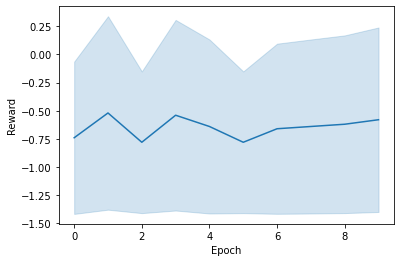

In [13]:
import cProfile
env = MarelleGymEnv()

einstein_model = FCModel(len(env.board.get_state()), len(env.board.id_to_action))

einstein=Reinforce(env, 1, einstein_model, lr=0.005, incentivize_captures=False, punish_opponent_captures=False)

piccolo=BetterRandomAgent(env, -1)


cProfile.run("""train_agent(
    env=env,
    n_epochs=10,
    n_trajectories=100,
    trained_agent=einstein,
    opponent_agent=piccolo,
    log_training=False
)""")